In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [3]:
fifa_df = pd.read_csv("../data/fifa_19.csv")

<IPython.core.display.Javascript object>

## Let's imagine now we have finished processing the data, and the fifa_19 df is relatively  clean ect. We now want to do some predictive modelling, the use-case requires that we have an interpretable model so we are going to use a simple decision tree

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

<IPython.core.display.Javascript object>

### We want to predict the position of a player based on their stats

In [7]:
fifa_df.tail()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K
18206,18206,246269,G. Nugent,16,https://cdn.sofifa.org/players/4/19/246269.png,England,https://cdn.sofifa.org/flags/14.png,46,66,Tranmere Rovers,...,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,€165K


<IPython.core.display.Javascript object>

In [10]:
## look at very basic info
fifa_df.Position.describe()

count     18147
unique       27
top          ST
freq       2152
Name: Position, dtype: object

<IPython.core.display.Javascript object>

In [11]:
# let's plot the value counts to check how balanced the data is

<IPython.core.display.Javascript object>

In [13]:
sns.__version__

'0.11.0'

<IPython.core.display.Javascript object>

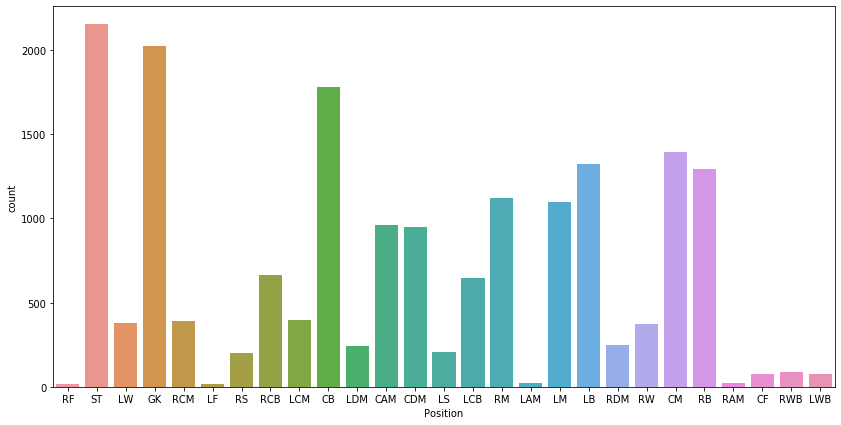

<IPython.core.display.Javascript object>

In [15]:
plt.figure(figsize=(14, 7))
sns.countplot(data=fifa_df, x="Position")

#### We can see that there are some positions which have much fewer data points, in a standard dataset this may be a sampling bias however here we know that this sample is the entire population (of players in fifa-19) so it is perfectly representative, the lower counts may be problematic for modeling purposes so we may want to combine groups such as rf, rf and cf, those groups could also be combined with st as a forwards group or something

#### For the purposes of showing how to train a model we won't worry about this but this can definitely be a gotcha! for example if your dataset if 99% one class you could have an almost perfect model which has zero discriminative power


In [16]:
#  let's collect the columns we want

<IPython.core.display.Javascript object>

In [21]:
print(fifa_df.columns)

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

<IPython.core.display.Javascript object>

### we want from finishing - GKReflexes

In [25]:
fifa_df.columns.get_loc("Finishing")

55

<IPython.core.display.Javascript object>

In [30]:
player_stats = fifa_df.iloc[
    :, fifa_df.columns.get_loc("Finishing") : fifa_df.columns.get_loc("GKReflexes")
]
#  note the stats are all on a similar scale 0-100, for some models we will want to nornalise/standardise the data
# but for a decision tree it shouldn't really matter

<IPython.core.display.Javascript object>

In [84]:
X = player_stats
y = fifa_df["Position"].astype(
    str
)  #  they are a df object which can be a bit anoying so convert to str

<IPython.core.display.Javascript object>

In [85]:
# y.values.astype(str)

<IPython.core.display.Javascript object>

In [86]:
from sklearn.preprocessing import LabelEncoder

## the y values are all strings, this doesn't really matter for a decision tree but we can change them to
#  encoded variables anyway

<IPython.core.display.Javascript object>

In [87]:
labels = LabelEncoder().fit_transform(y)

<IPython.core.display.Javascript object>

In [53]:
# look at the arguments
DecisionTreeClassifier?

<IPython.core.display.Javascript object>

In [143]:
## annoyingly we've got some missing numbers so there is an error, let's do some digging
np.isfinite(X).sum()

Finishing          18159
HeadingAccuracy    18159
ShortPassing       18159
Volleys            18159
Dribbling          18159
Curve              18159
FKAccuracy         18159
LongPassing        18159
BallControl        18159
Acceleration       18159
SprintSpeed        18159
Agility            18159
Reactions          18159
Balance            18159
ShotPower          18159
Jumping            18159
Stamina            18159
Strength           18159
LongShots          18159
Aggression         18159
Interceptions      18159
Positioning        18159
Vision             18159
Penalties          18159
Composure          18159
Marking            18159
StandingTackle     18159
SlidingTackle      18159
GKDiving           18159
GKHandling         18159
GKKicking          18159
GKPositioning      18159
dtype: int64

<IPython.core.display.Javascript object>

In [119]:
X.shape

(18207, 32)

<IPython.core.display.Javascript object>

### the sum is less than the total which means that there are indeed some missing. we should look into this more if we encounter this in our data but for this example we will just remove them

In [121]:
finite_rows = np.isfinite(X).any(axis=1)

<IPython.core.display.Javascript object>

In [122]:
X_finite = X[finite_rows]
labels_finite = labels[finite_rows]

<IPython.core.display.Javascript object>

In [144]:
from sklearn.model_selection import train_test_split

<IPython.core.display.Javascript object>

In [145]:
X_train, X_test, y_train, y_test = train_test_split(
    X_finite, labels_finite, test_size=0.3
)

<IPython.core.display.Javascript object>

In [156]:
%%time
clf = DecisionTreeClassifier(max_depth=None)
clf = clf.fit(X_train, y_train)

CPU times: user 310 ms, sys: 6.56 ms, total: 316 ms
Wall time: 318 ms


<IPython.core.display.Javascript object>

In [157]:
# plt.figure(figsize=(80, 50))
# #  we can use graphviz to make this formatted better, it's too big for a notebook
# but will leave the code here in case its useful
# plot_tree(
#     clf,
#     filled=True,
#     feature_names=list(player_stats.columns),
#     #     class_names=y,
#     label="root",
#     fontsize=20,
# )
# plt.show()

<IPython.core.display.Javascript object>

In [158]:
from sklearn.metrics import classification_report

<IPython.core.display.Javascript object>

In [159]:
preds = clf.predict(X_test)

<IPython.core.display.Javascript object>

In [160]:
len(np.unique(y))

28

<IPython.core.display.Javascript object>

In [161]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{classification_report(y_test, preds, label = )}\n"
)

SyntaxError: invalid syntax (<fstring>, line 1)

<IPython.core.display.Javascript object>

## The model is a bit better than random (1./28) but not great, we'll work on improving this in the next iteration